<a href="https://colab.research.google.com/github/yiyichanmyae/CNN/blob/main/cnn_maxpooling_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Load FashionMNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
# Define the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32, 
        (2,2), 
        activation='relu',
        input_shape=(28, 28, 1)
    ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(
        64,
        (3,3),
        activation='relu'
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               991360    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [7]:
# Setup Training Parameters
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    training_images,
    training_labels,
    epochs=10
)

# Evaluate on the test set
print('\nMODEL EVALUTION: ')
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.4100 - accuracy: 0.8514
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2696 - accuracy: 0.9016
Epoch 3/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2197 - accuracy: 0.9182
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1796 - accuracy: 0.9314
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1461 - accuracy: 0.9449
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1150 - accuracy: 0.9574
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0892 - accuracy: 0.9672
Epoch 8/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0711 - accuracy: 0.9734
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0558 - accuracy: 0.9795
Epoch 10/10
1875/1875 [==============================] - 59s 32m

# Visualizing the Convolutions and Pooling

In [8]:
print(test_labels[:50])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]


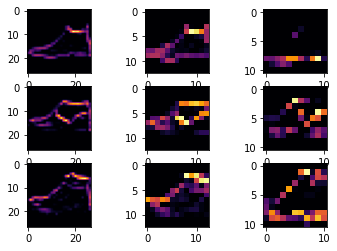

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,3)

FIRST_IMG = 0
SECOND_IMG = 23
THIRD_IMG = 28
CONVOLUTION_NUMBER = 1

# each output after each layer
layers_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(
    inputs = model.input,
    outputs = layers_outputs
)

for x in range(0,3):
  f1 = activation_model.predict(test_images[FIRST_IMG].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMG].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMG].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06f205e1d0>,
      dtype=object)